
##COSC2667/2777 - Data Science and AI Postgraduate Projects
### Introduction – Data Augmentation for non-image data (genetics )
> Project: Identify data augmentation techniques for tabular data and
understand their impact on Random Forest models employed for
disease detection in human genetic data

Submitted By: Osama Alfawzan , Jyoti  , Chander Mohan , Manavjit Singh ,Freddie Twigg





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We will read the CSV file located in your Google Drive directory and perform the operations on the DataFrame

## 1. Pre-processing

### 1.1 Packages

Below code imports a wide range of libraries and modules commonly used in data analysis, machine learning, and statistical analysis. These libraries provide tools for data manipulation, visualization, machine learning model development, preprocessing, and model evaluation. The code also includes some modules for handling imbalanced datasets and suppressing warning messages.

> Here's a summary of what each of these imports does:


* pandas: A popular data manipulation library that provides data structures and functions for working with structured data, such as DataFrames.

* numpy: A fundamental library for numerical operations in Python, providing support for arrays and mathematical functions.

* matplotlib.pyplot: A library for creating data visualizations, including plots and charts.

* seaborn: A data visualization library built on top of Matplotlib, providing additional functionality and aesthetics for data plotting.

* sklearn.ensemble: The RandomForestClassifier and RandomForestRegressor are classes from the scikit-learn library for implementing random forest models for classification and regression tasks, respectively.

* sklearn.preprocessing: Various preprocessing tools like OneHotEncoder, StandardScaler, and PolynomialFeatures for data preprocessing and feature engineering.

* sklearn.compose: The make_column_transformer function for creating custom transformers and transformers for different columns in the data.

* sklearn.model_selection: Functions and classes for model selection, including train_test_split, cross_val_score, RepeatedStratifiedKFold, and GridSearchCV.

* sklearn.pipeline: The Pipeline class for creating a sequence of data processing steps and model training.

* sklearn.metrics: Functions for evaluating model performance, including accuracy_score, classification_report, roc_curve, and roc_auc_score.

* sklearn.decomposition: The PCA class for Principal Component Analysis, a technique for dimensionality reduction.

* scipy.stats: Functions and classes for statistical analysis, including chi2_contingency for chi-squared tests, spearmanr for Spearman rank-order correlation, and ttest_rel for related t-tests.

* imblearn.over_sampling and imblearn.under_sampling: Modules from the imbalanced-learn library for handling imbalanced datasets through techniques like oversampling (SMOTE, ADASYN, RandomOverSampler) and undersampling (RandomUnderSampler).

* warnings: The filterwarnings function is used to suppress specific warning messages in the code execution

In [2]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.decomposition import PCA

from scipy.stats import chi2_contingency, spearmanr, ttest_rel

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


import warnings
warnings.filterwarnings('ignore')

### 1.2 Import Data

We Specify the file path to the CSV file we want to read.

df = pd.read_csv(file_path): Reads the CSV file located at the 'file_path' and stores its content in a pandas DataFrame called 'df.' This allows us to work with the data in a tabular format.
Afterwards, we Created a new variable 'samples' that contains the data from the 'samples' column of the DataFrame. This line extracts a specific column from the DataFrame. Next , we modifies the 'df' DataFrame by removing the 'samples' and 'score' columns.
The updated DataFrame no longer contains these columns.
And lastly , we created a new variable 'columns' that contains the names of columns in the 'df' DataFrame, starting from the second column (index 1). This excludes the first column, as column indices are zero-based.

In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/data/vcf_with_labels.csv'  # Update the path to your CSV file

df = pd.read_csv(file_path)

samples = df['samples']
df = df.drop(columns=['samples', 'score'])
columns = df.columns[1:]

# Print the first 5 rows of the DataFrame and a subset of columns
print("Samples:")
print(samples)

print("\nFirst 5 rows of the modified DataFrame:")
df.head()

# Print the names of the first 5 columns (excluding the first column)
print("\nNames of the first 5 columns:")
columns[:5]

Samples:
0       HG00096
1       HG00097
2       HG00099
3       HG00100
4       HG00101
         ...   
1028    NA20815
1029    NA20818
1030    NA20819
1031    NA20826
1032    NA20828
Name: samples, Length: 1033, dtype: object

First 5 rows of the modified DataFrame:

Names of the first 5 columns:


Index(['chr22:16050408:T:C', 'chr22:16050612:C:G', 'chr22:16050678:C:T',
       'chr22:16050984:C:G', 'chr22:16051107:C:A'],
      dtype='object')

### 1.3 Split train and test sets

Below we split the data into training and testing sets. The train_test_split function from scikit-learn is used for this purpose. Here's how the parameters work:

X and y: These are the feature matrix and target variable that you want to split.
test_size: It specifies the proportion of the data that should be allocated to the test set. In this case, 30% of the data is reserved for testing, and 70% is used for training.
random_state: This parameter sets the seed for the random number generator. Using the same seed ensures that the data split is reproducible.
stratify = y: This parameter is set to 'y' to ensure that the class distribution in the original dataset is preserved in the training and test sets. This is important for maintaining a balanced representation of classes, especially in classification tasks.

In [4]:
y = df.label.values
X = df.drop(columns = 'label').values
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 999,
                                                    stratify = y)

print("Orginal dataset shape:", df.shape)
print("Features training dataset shape after split:", X_train.shape)
print("Features test dataset shape after split:", X_test.shape)
print("Target training dataset shape after split:", y_train.shape)
print("Target test dataset shape after split:", y_test.shape)

Orginal dataset shape: (1033, 1989)
Features training dataset shape after split: (723, 1988)
Features test dataset shape after split: (310, 1988)
Target training dataset shape after split: (723,)
Target test dataset shape after split: (310,)


## 2. EDA

EDA stands for "Exploratory Data Analysis," which is an initial and critical step in the data analysis process, especially when dealing with tabular data in genetics. EDA involves exploring data sets through statistical and visual methods to understand the data's characteristics, quality, and relationships.


### 2.1 Check for missing values
There are no missing values in the dataset.

In [5]:
df.isnull().sum()

label                  0
chr22:16050408:T:C     0
chr22:16050612:C:G     0
chr22:16050678:C:T     0
chr22:16050984:C:G     0
                      ..
chr22:17796926:T:TA    0
chr22:17796951:A:G     0
chr22:17796971:C:A     0
chr22:17797010:G:A     0
chr22:17797041:T:C     0
Length: 1989, dtype: int64

In [6]:
df.isnull().sum().sum()

0

### 2.2 Label Distributions
The labels in the dataset can take on a value of 0 or 1. A value of 0 means there is no disease present in the person represented by that row, while a value of 1 means the disease is present. The dataset is imbalanced, with a ratio of approximately 3:2 observations of no disease to disease. This means that a scoring metric needs to be chosen that can account for imbalance in the dataset. It also provides the opportunity to experiment with oversampling techniques.


> Each column in the dataset represents a gene. They can take the values:​

> 0: No mutation​

> 1: Half mutation (one parent gave the mutation)​

> 2: Full mutation (both parents gave the mutation)​

There are 1,033 rows and 1,988 gene columns

In [7]:
label_counts = df['label'].value_counts()

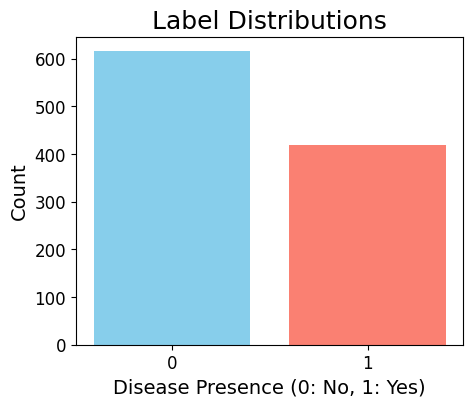

In [8]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.bar(label_counts.index, label_counts, tick_label = label_counts.index,color=['skyblue', 'salmon'])
ax.set_title('Label Distributions', fontsize=18)
ax.set_ylabel('Count',fontsize=14)
ax.set_xlabel('Disease Presence (0: No, 1: Yes)', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

### 2.3 Human Genetic Data Columns
The features of the dataset are genes, and their values can take on 0, 1 or 2. A value of 0 means there is no mutation present, a value of 1 means 'half' a mutation is present, and a value of 2 represents a 'full' mutation.

In [9]:
df.drop(columns='label').head()

chr22:16050408:T:C  chr22:16050612:C:G  chr22:16050678:C:T  \
0                   0                   1                   0   
1                   1                   1                   1   
2                   1                   1                   1   
3                   0                   0                   0   
4                   0                   1                   0   

   chr22:16050984:C:G  chr22:16051107:C:A  chr22:16051249:T:C  \
0                   0                   0                   0   
1                   0                   1                   1   
2                   0                   1                   1   
3                   0                   0                   0   
4                   0                   1                   0   

   chr22:16051347:G:C  chr22:16051453:A:C  chr22:16051477:C:A  \
0                   0                   0                   0   
1                   1                   1                   0   
2                   1                   1                   0   
3                   1                   0                   0   
4                   1                   0                   0   

   chr22:16051480:T:C  ...  chr22:17796639:C:T  chr22:17796685:T:A  \
0                   0  ...                   0                   0   
1                   1  ...                   0                   1   
2                   1  ...                   0                   0   
3                   0  ...                   0                   0   
4                   1  ...                   0                   0   

   chr22:17796833:T:C  chr22:17796921:T:TTAAC  chr22:17796925:C:CTAAT  \
0                   0                       1                       1   
1                   0                       1                       1   
2                   0                       0                       0   
3                   0                       0                       0   
4                   0                       0                       0   

   chr22:17796926:T:TA  chr22:17796951:A:G  chr22:17796971:C:A  \
0                    1                   0                   1   
1                    1                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   

   chr22:17797010:G:A  chr22:17797041:T:C  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0  

[5 rows x 1988 columns]

In [10]:
df.drop(columns='label').shape

(1033, 1988)

In [11]:
df['chr22:17726469:T:G'].value_counts()

2    666
1    311
0     56
Name: chr22:17726469:T:G, dtype: int64

#### 2.3.1 Visualising Column Means
The means for each column of gene mutations were visualised. It can be seen that the vast majority of means are very small, close to zero.  90% of the means are less than 0.50, and only around 5% have a mean mutation of more than 1. Only a small portion of columns contain a significant amount of mutation.

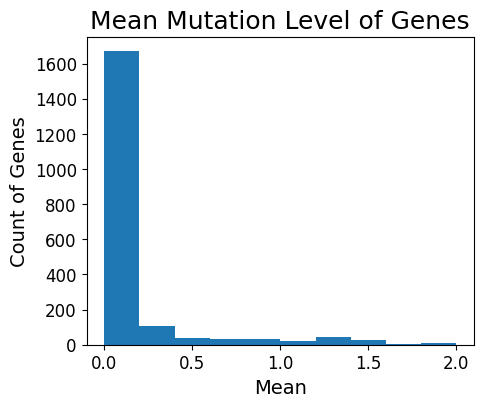

The percentage of columns with a mean mutation of less than 0.50 is 89.99%
The percentage of columns with a mean mutation greater than 1 is 5.43%


In [12]:
means = df.drop(columns = 'label').describe().iloc[1]

fig, ax = plt.subplots(figsize=(5, 4))

ax.hist(means)
ax.set_title('Mean Mutation Level of Genes',fontsize=18)
ax.set_xlabel('Mean',fontsize=14)
ax.set_ylabel('Count of Genes',fontsize=14)
ax.tick_params(axis='both', labelsize=12)


plt.show()

small_means_pct = len(means[means <= .5])/len(means)*100
large_means_pct = len(means[means > 1])/len(means)*100
print(f"The percentage of columns with a mean mutation of less than 0.50 is {small_means_pct:.2f}%")
print(f"The percentage of columns with a mean mutation greater than 1 is {large_means_pct:.2f}%")

Looking at the value counts, it can be seen that there are a number of recurring values. The value 0.000968 occurs 449 times and is equal to 1/1,033, with 1,033 being the number of rows in the dataset. This means that it is most common for any column to have only one occurrence of a mutation in the dataset. The next most common value is 0.001936 = 2/1,033, meaning only two occurrences of a half mutation or one full mutation, and the next is 0.002904 = 3/1,033 and so on. Mutations in the genes are very rare for most of the genes.

In [13]:
means.value_counts()

0.000968    449
0.001936    151
0.002904     98
0.003872     72
0.004840     57
           ... 
0.900290      1
0.079380      1
0.547919      1
1.286544      1
0.798645      1
Name: mean, Length: 430, dtype: int64

### 2.4 Correlation between genes and labels

#### 2.4.1 Chi-squared test for independence
154 features have a statistically significant association with the target variable. The association indicates that the distributions of these feature values are not independent of the target variable values.

In [14]:
ordinal_columns = df.drop(columns='label').columns

chisq_results = []

for col in ordinal_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df['label'])

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    chisq_results.append({
        "Column": col,
        "Chi-Square Statistic": chi2,
        "P-value": p,
        "Degrees of Freedom": dof,
        "Expected Frequencies Table": expected
    })

In [15]:
count = 0
for result in chisq_results:
    if result['P-value'] < 0.05:
        count += 1

print(count)

154


#### 2.4.2 Spearman Rank Coefficient
We are calculating Spearman's rank correlation coefficient for a list of ordinal columns in a DataFrame and then counting how many of these correlations are statistically significant at the 0.05 significance level.

In [16]:
spearmanr_results = []

for col in ordinal_columns:
    # Calculate Spearman's rank correlation
    rho, p_value = spearmanr(df[col], df['label'])

    spearmanr_results.append({
        "Column": col,
        "Correlation": rho,
        "P-value": p_value
    })

In [17]:
count = 0
for result in spearmanr_results:
    if result['P-value'] < 0.05:
        count += 1

print(count)

238


Results:  Out of the 1988 features, 238 features have a p-value less than 0.05 when correlated with the target variable. As the value of these features increases or decreases, the target variable tends to consistently increase or decrease. The count represents the number of columns that exhibit significant monotonic relationships with the 'label' column.

#### 2.4.3 Visualising the Means of Significant Columns
Visualising the means of the columns with significant correlations to the disease, it can be seen that the columns with a large amount of mutatation are more represented than before. More mutation does appear to suggest a higher likelihood of disease.

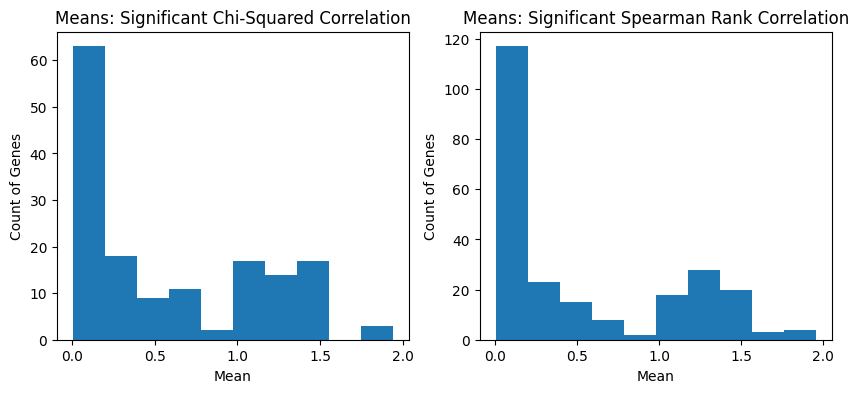

In [18]:
# Get significant column names
chi_significant_cols = []
for result in chisq_results:
    if result['P-value'] < 0.05:
        chi_significant_cols.append(result['Column'])
spear_significant_cols = []
for result in spearmanr_results:
    if result['P-value'] < 0.05:
        spear_significant_cols.append(result['Column'])

# Summarise means
chi_means = df[chi_significant_cols].describe().iloc[1]
spear_means = df[spear_significant_cols].describe().iloc[1]

# Plot means
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(chi_means)
axs[0].set_title('Means: Significant Chi-Squared Correlation')
axs[0].set_xlabel('Mean')
axs[0].set_ylabel('Count of Genes')

axs[1].hist(spear_means)
axs[1].set_title('Means: Significant Spearman Rank Correlation')
axs[1].set_xlabel('Mean')
axs[1].set_ylabel('Count of Genes')

plt.show()

### 2.5 Principal Component Analysis (PCA)
A PCA was performed on the training data. From the resulting variance plot, it can be seen that the first 200 components explain about 95% of the variance. The score plot of the first two components does not show clusters for the disease label, unfortunately.

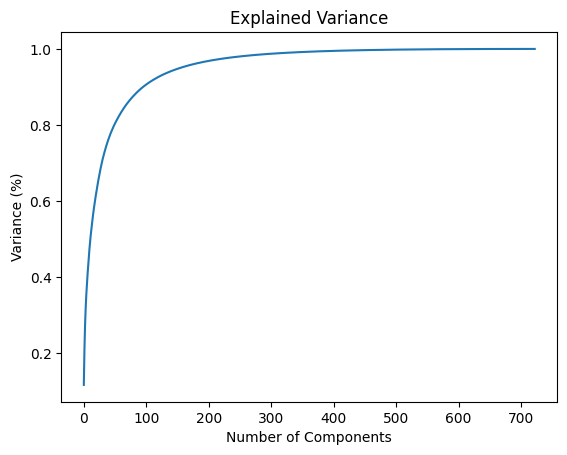

In [19]:
pca = PCA().fit(X_train)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

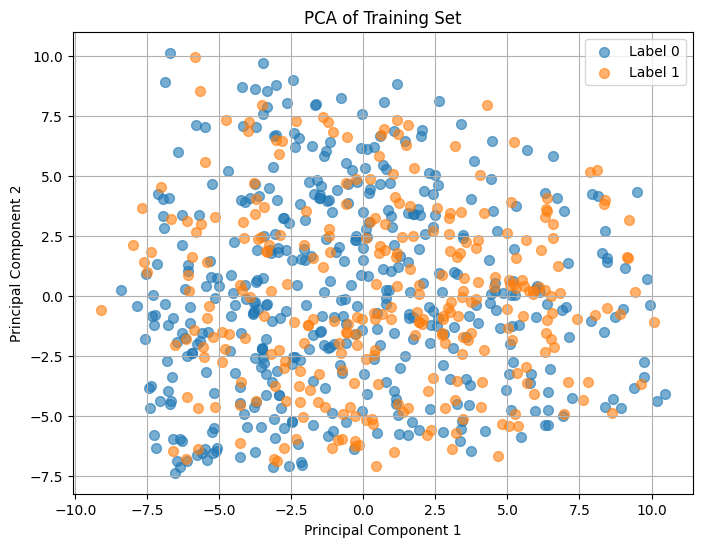

In [20]:
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_train == 0][:, 0], X_pca[y_train == 0][:, 1], s=50, label='Label 0', alpha=0.6)
plt.scatter(X_pca[y_train == 1][:, 0], X_pca[y_train == 1][:, 1], s=50, label='Label 1', alpha=0.6)
plt.title('PCA of Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

## 3. Run Models

### 3.1 Search for Good Experimental Hyperparameters to Serve as Baseline

In [21]:
# Set parameters
rf_classifier = RandomForestClassifier(random_state = 999)

cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)

scoring_metric = 'f1' # For class imbalance

params_RF = {'criterion': ['gini','entropy'],
             'n_estimators':[100, 115, 130],
             'max_depth': [40, 50, 60]}

rf_classifier = RandomForestClassifier(random_state=999): This line initializes a Random Forest Classifier model. It's set to use the random_state parameter with a value of 999 to ensure reproducibility of the results.

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999): Here, a cross-validation method is defined. The RepeatedStratifiedKFold method is used with the following parameters:

n_splits: Specifies the number of folds (subsets) for cross-validation. In this case, there are 5 folds.
n_repeats: Determines how many times the cross-validation process is repeated. It's set to 3 repeats.
random_state: Sets the seed for the random number generator to ensure that the cross-validation splits are reproducible.
scoring_metric = 'f1': This variable specifies the scoring metric used during model evaluation. In this case, the 'f1' score is used. The 'f1' score is a metric commonly used for classification tasks, especially when dealing with imbalanced datasets. It combines precision and recall into a single value, making it useful for evaluating models in situations where there is an uneven distribution of classes.

params_RF: This variable is a dictionary that contains hyperparameter values to be explored during model tuning. For a Random Forest Classifier, the following hyperparameters are considered:

criterion: The function used to measure the quality of a split in the tree. It can take values 'gini' or 'entropy.'
n_estimators: The number of trees in the random forest. Here, three different values (100, 115, 130) are considered.
max_depth: The maximum depth of the individual decision trees in the forest. Three different depth values (40, 50, 60) are explored.

These parameters and hyperparameters are crucial for configuring and fine-tuning the Random Forest Classifier for a specific machine learning task. The cross-validation method helps assess the model's performance while mitigating issues related to overfitting or data randomness. The 'f1' scoring metric is used to evaluate the model's accuracy, especially in situations where class imbalance is a concern. The hyperparameters in the params_RF dictionary are potential values to explore during hyperparameter tuning to find the best model configuration.

#### 3.1.1 Baseline Without PCA

In [22]:
# Perform GridSearch
gs_RF = GridSearchCV(estimator=rf_classifier,
                     param_grid=params_RF,
                     cv=cv_method,
                     verbose=1,
                     scoring=scoring_metric)

gs_RF.fit(X_train, y_train)

Fitting 15 folds for each of 18 candidates, totalling 270 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=RandomForestClassifier(random_state=999),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [40, 50, 60],
                         'n_estimators': [100, 115, 130]},
             scoring='f1', verbose=1)

Here,  we set up a grid search for hyperparameter tuning with a Random Forest Classifier. It explores different combinations of hyperparameter values, cross-validates the model, and records the performance using the 'f1' scoring metric.
This process helps in finding the best combination of hyperparameters that optimizes the model's performance on the training data.

In [23]:
print('The best parameters for Random Forest Classifier without PCA are: ', gs_RF.best_params_)
print("The best score using the F1 metric is:", round(gs_RF.best_score_,3))

The best parameters for Random Forest Classifier without PCA are:  {'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 115}
The best score using the F1 metric is: 0.407


#### 3.1.2 Baseline With PCA

In [24]:
# Perform GridSearch
gs_RF = GridSearchCV(estimator=rf_classifier,
                     param_grid=params_RF,
                     cv=cv_method,
                     verbose=1,
                     scoring=scoring_metric)

gs_RF.fit(X_pca, y_train)

Fitting 15 folds for each of 18 candidates, totalling 270 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=RandomForestClassifier(random_state=999),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [40, 50, 60],
                         'n_estimators': [100, 115, 130]},
             scoring='f1', verbose=1)

In [25]:
print('The best parameters for Random Forest Classifier with PCA are: ', gs_RF.best_params_)
print("The best score using the F1 metric is:", round(gs_RF.best_score_,3))

The best parameters for Random Forest Classifier with PCA are:  {'criterion': 'entropy', 'max_depth': 40, 'n_estimators': 100}
The best score using the F1 metric is: 0.213


The F1 results above suggest that some information that's useful for classification is lost during the PCA transformation. Therefore, we will proceed without PCA.

In [26]:
# Set baseline parameters
base_params = {'criterion': 'entropy',
             'n_estimators': 115,
             'max_depth': 50}

### 3.2 Model Building - Random Classifier
Function, train_runs, is designed for training and evaluating Random Forest (RF) classifiers with different random seeds and collecting relevant performance metrics. It's a useful tool for model evaluation and feature analysis in machine learning tasks.

> The function initializes an empty dictionary called results to store performance metrics for each RF classifier trained with different seeds.
It also initializes a list called importances filled with zeros to accumulate feature importances.
> After training RF classifiers with all seeds, the code calculates the average feature importances by dividing the accumulated importances by the number of seeds used.
> output : The function returns two main items:
results: A dictionary containing performance metrics, including classification metrics and ROC-related information, for each RF classifier trained with different seeds.
importances: A list of feature importances averaged across all RF classifiers.

In [27]:
def train_runs(X_train, y_train, X_test, y_test, base_params, seeds):
    """
    Builds RF Classifiers and returns relevant metrics
    """
    results = {}
    importances = [0] * len(X_train[0])

    for seed in seeds:

        rf_classifier = RandomForestClassifier( random_state=seed, **base_params)

        rf_classifier.fit(X_train, y_train)

        y_pred = rf_classifier.predict(X_test)

        results[str(seed)] = classification_report(y_test, y_pred, output_dict = True)

        y_scores = rf_classifier.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        auc_score = roc_auc_score(y_test, y_scores)
        results[str(seed)]['fpr'] = fpr
        results[str(seed)]['tpr'] = tpr
        results[str(seed)]['thresholds'] = thresholds
        results[str(seed)]['auc'] = auc_score
        importances += rf_classifier.feature_importances_

    importances = [x / len(seeds) for x in importances]

    return results, importances

In [28]:
# Do 30 runs of each technique using as many seeds
seeds = np.arange(0, 30)

### 3.3 Data Augmentation and Oversampling Techniques

#### 3.3.1 Mixup

Mixup is a data augmentation technique that generates a weighted combination of random pairs from the training data.

We have defined code for a mixup augmentation function that blends input data and labels with different mixing ratios. It applies this function to various combinations of alpha and ratio to create augmented data samples for machine learning purposes. The resulting mixed data is stored in dictionaries for further use in training and evaluation.
> Mixup augmentation is a technique commonly used to improve the robustness and generalization of machine learning model.

> ratio_mixup(x, y, alpha, ratio=1, beta_dis=False): This function performs mixup augmentation on input data and labels. The parameters are as follows:
* x: The input data.
* y: The corresponding labels.
* alpha: A hyperparameter that controls the mixing strength.
* ratio: A parameter that controls the proportion of data samples to be mixed. The default is 1, meaning all samples are mixed.
* beta_dis: A Boolean parameter that, when set to True, uses a beta distribution to determine mixing ratios; otherwise, a uniform mixing ratio is used.

In [29]:
def ratio_mixup(x, y, alpha, ratio = 1, beta_dis = False):
    """
    Returns mixed inputs and mixed labels using cross-label augmentation.
    """
    if ratio < 1:
        num_elements_to_change = int(len(y) * (1 - ratio))
        indices_to_change = np.random.choice(len(y), num_elements_to_change, replace=False)

    if beta_dis == True:
        lam = np.random.beta(alpha, alpha)
        y_lams = np.array([lam])

        for i in range(len(y) - 1):
            lam = np.random.beta(alpha, alpha)
            y_lams = np.append(y_lams, lam)

        if ratio < 1:
            y_lams[indices_to_change] = 1

        x_lams = y_lams.reshape(-1, 1)
        batch_size = x.shape[0]
        index = np.random.permutation(batch_size)
        mixed_x = x_lams * x + (1 - x_lams) * x[index, :]
        mixed_y = y_lams * y + (1 - y_lams) * y[index]

    else:
        shape = (len(y))
        y_lams = np.full(shape, alpha)

        if ratio < 1:
            y_lams[indices_to_change] = 1
        x_lams = y_lams.reshape(-1, 1)

        batch_size = x.shape[0]
        index = np.random.permutation(batch_size)
        mixed_x = x_lams * x + (1 - x_lams) * x[index, :]
        mixed_y = y_lams * y + (1 - y_lams) * y[index]

    mixed_y = (mixed_y >= 0.5).astype(int)

    return mixed_x, mixed_y

alphas = [0.1, 0.3, 0.49, 0.7, 0.9]
ratios = [0.25, 0.5, 0.75, 1]

mixup_data = {}

for alpha in alphas:
    for ratio in ratios:
        X_mix, y_mix = ratio_mixup(X_train, y_train, alpha, ratio)
        mixup_data[f'mixup_a{alpha}_r{ratio}'] = {'X':X_mix, 'y':y_mix}

X_mix, y_mix = ratio_mixup(X_train, y_train, 0.2, beta_dis = True)
mixup_beta = {'X':X_mix, 'y':y_mix}

#### 3.3.2 Noise Injection

Uniform noise: Adding random values from a constant range to data points for augmentation.  
Gaussian noise: Introducing variations to data points based on a normal distribution for augmentation.

We have defined two functions, add_gaussian_noise and add_uniform_noise, and using these functions to introduce different levels of noise to a dataset. The goal is to create datasets with varying levels of Gaussian and uniform noise.

In [30]:
np.random.seed(999)

def add_gaussian_noise(X, sigma=0.1):
    noise = np.random.normal(0, sigma, X.shape)
    return X + noise

def add_uniform_noise(X, intensity=0.1):
    noise = np.random.uniform(-intensity, intensity, X.shape)
    return X + noise

noise_levels = [0.01, 0.03, 0.05]
noise_data = {}

for level in noise_levels:
    X_gaussian = add_gaussian_noise(X_train, sigma=level)
    X_uniform = add_uniform_noise(X_train, intensity=level)
    noise_data[f'gaussian_{level}'] = X_gaussian
    noise_data[f'uniform_{level}'] = X_uniform

#### 3.3.3 Synthetic Minority Oversampling Technique (SMOTE)

SMOTE: A data augmentation technique that generates synthetic samples in the feature space to balance an imbalanced dataset.

> X_smote, y_smote = smote.fit_resample(X_train, y_train): This line applies the SMOTE algorithm to the training data to balance the class distribution. The parameters are as follows:

> X_train: The feature matrix of the training data.
> y_train: The corresponding target labels for the training data.
The fit_resample method of the SMOTE object is called, and it returns two arrays:

> X_smote: The synthetic oversampled feature matrix. It contains additional samples generated for the minority class to balance the class distribution.
> y_smote: The corresponding target labels for the synthetic samples.

> The random_state parameter ensures that the generation of synthetic samples is reproducible. After applying SMOTE, the training dataset is typically better balanced, which can improve the performance

In [31]:
smote = SMOTE(random_state=999)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

#### 3.3.4 Adaptive Synthetic Sampling (ADASYN)

ADASYN: A data augmentation technique that adaptively generates synthetic samples based on the distribution of minority class instances, emphasizing regions where classification is difficult.

Mixup augmentation, on the other hand, blends samples from the dataset to create new ones, promoting model generalization and robustness.

The combination of ADASYN and Mixup aims to improve the robustness and generalization capabilities of a machine learning model by addressing class imbalance and introducing diversity into the training data

> The X_adasyn_mixup and y_adasyn_mixup arrays contain the augmented data with both ADASYN and Mixup applied.

In [32]:
adasyn = ADASYN(random_state=999)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

# Combining ADASYN + Mixup 0.1 (Best sampling + best DA from results)
X_adasyn_mixup, y_adasyn_mixup = ratio_mixup(X_adasyn, y_adasyn, 0.1)

#### 3.3.5 Random Undersampling and Random Oversampling

Random Undersampling: Reducing the number of samples from over-represented classes to balance the dataset.  
Random Oversampling: Duplicating or generating additional samples for under-represented classes to balance the dataset.

RUS and ROS techniques can be beneficial for genetics data analysis by mitigating class imbalance issues, reducing model bias, and improving the detection of rare genetic mutations or disease-related variants

In [33]:
rus = RandomUnderSampler(random_state=999)
X_under, y_under = rus.fit_resample(X_train, y_train)

ros = RandomOverSampler(random_state=999)
X_over, y_over = ros.fit_resample(X_train, y_train)

### 3.4 PCA plots

In [34]:
def plot_pca(X_pca, y, title, ax):
    ax.scatter(X_pca[y == 0][:, 0], X_pca[y == 0][:, 1], s=50, label='Label 0', alpha=0.6)
    ax.scatter(X_pca[y == 1][:, 0], X_pca[y == 1][:, 1], s=50, label='Label 1', alpha=0.6)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('Principal Component 1', fontsize=8)
    ax.set_ylabel('Principal Component 2', fontsize=8)
    ax.legend(fontsize=7)
    ax.grid(True)

 We created function to desing scatter plots of data points in a two-dimensional PCA space, allowing for the visualization of data points belonging to different classes (labels)

#### 3.4.1 Mixup PCA

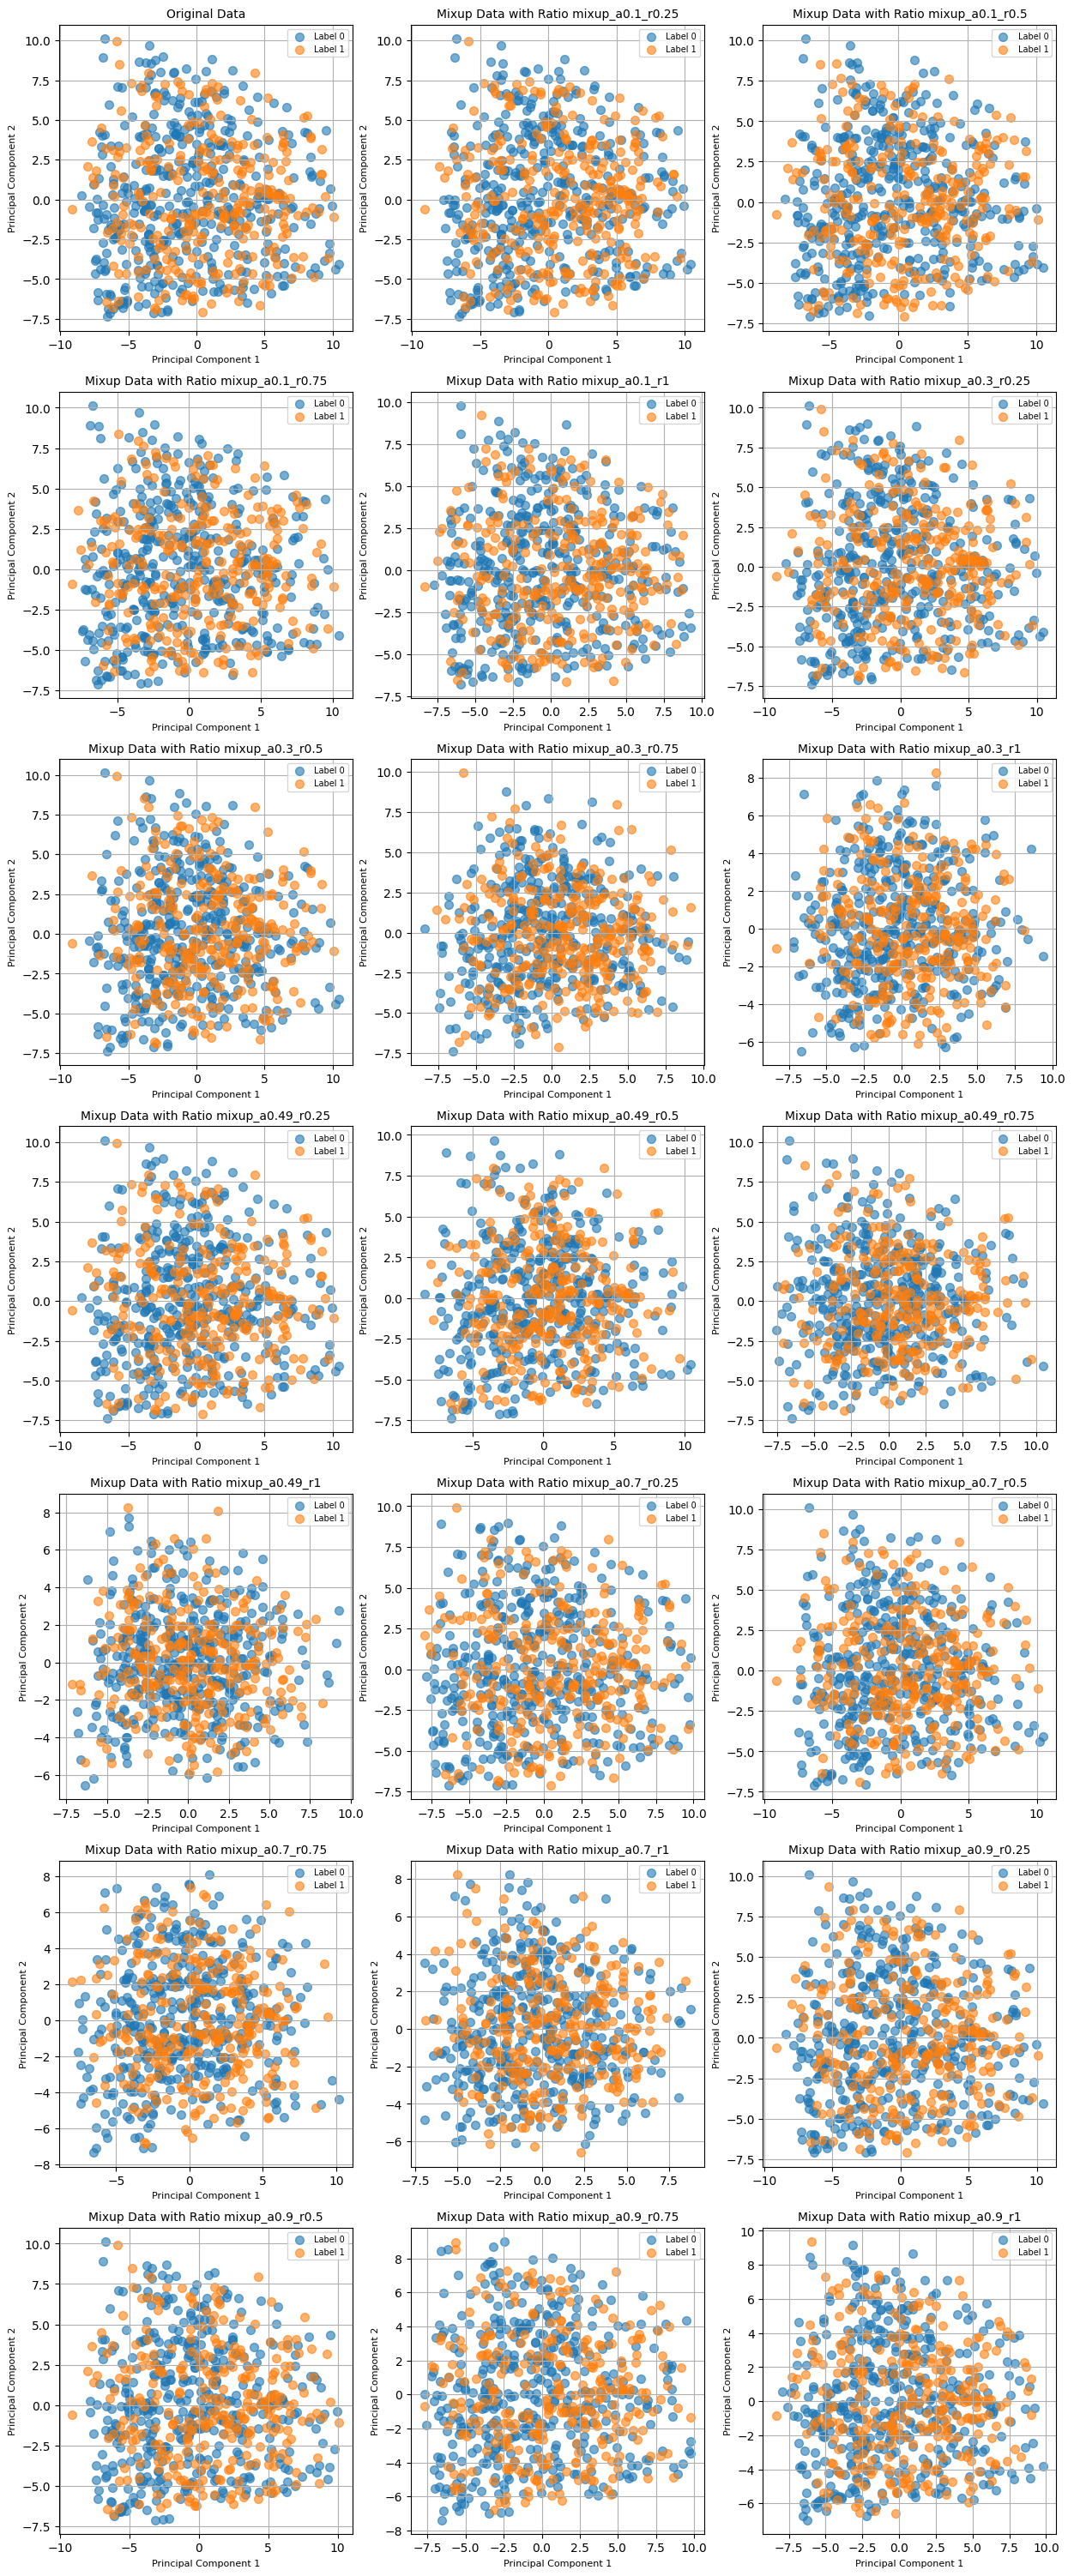

In [35]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 38))

positions = [
    (0, 0), (0, 1), (0, 2),
    (1, 0), (1, 1), (1, 2),
    (2, 0), (2, 1), (2, 2),
    (3, 0), (3, 1), (3, 2),
    (4, 0), (4, 1), (4, 2),
    (5, 0), (5, 1), (5, 2),
    (6, 0), (6, 1), (6, 2),
]
plot_pca(X_pca, y_train, 'Original Data', axes[positions[0]])
i = 1
for ratio, data in mixup_data.items():
    X_mix = data['X']
    y_mix = data['y']
    X_mix_pca = pca.transform(X_mix)
    plot_pca(X_mix_pca, y_mix, f'Mixup Data with Ratio {ratio}', axes[positions[i]])
    i += 1

This provides a visual representation of how data distributions change as the mixup ratio varies, allowing for a better understanding of the impact of mixup augmentation on the data.

#### 3.4.2 Noise Injection PCA

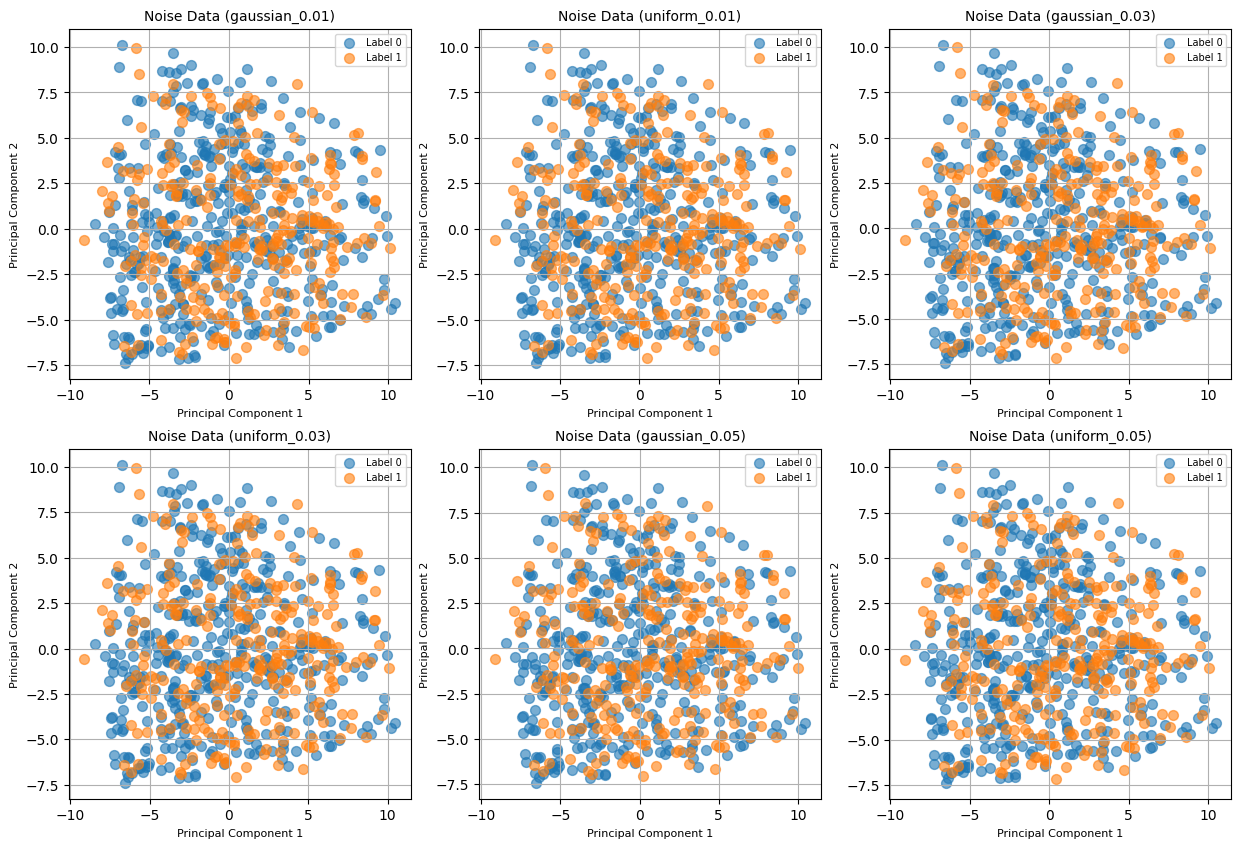

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
i = 0
for name, X_noise in noise_data.items():
    X_noise_pca = pca.transform(X_noise)
    plot_pca(X_noise_pca, y_train, f'Noise Data ({name})', axes[positions[i]])
    i += 1

This provides a visual representation of how noise affects the data distribution in the PCA space, allowing for a better understanding of the impact of different noise levels on the data.


> The code iterates through the noise_data dictionary, which contains various noisy datasets:

> For each noisy dataset, it extracts the PCA-transformed noisy data (X_noise_pca) from the noise_data dictionary.

> It uses the plot_pca function to create a scatter plot of the noisy data with a title that includes the name of the noise level (e.g., 'gaussian_0.01', 'uniform_0.01', etc.).

>The subplots are positioned in the grid according to the positions list, and the i variable is used to iterate through the positions.

#### 3.4.3 Sampling Techniques PCA

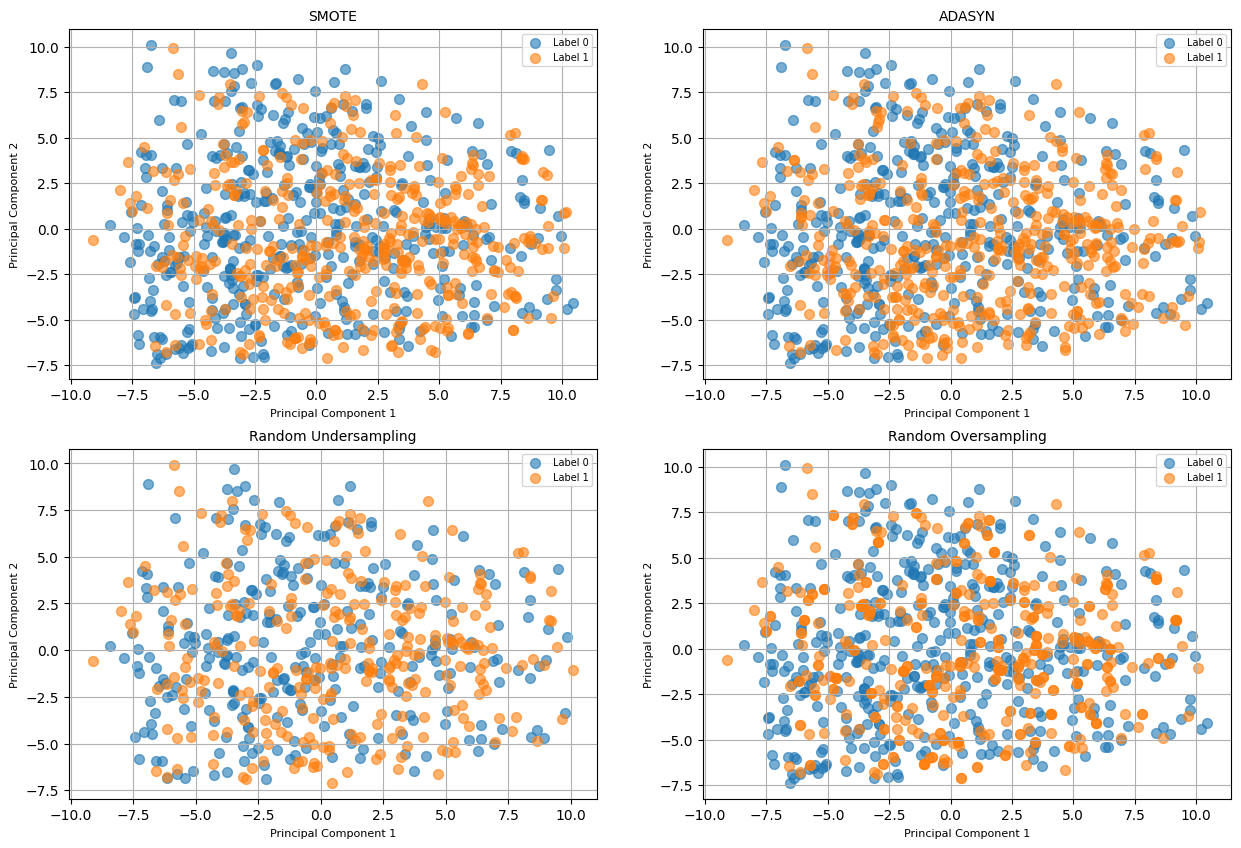

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

X_smote_pca = pca.transform(X_smote)
plot_pca(X_smote_pca, y_smote, 'SMOTE', axes[positions[0]])

X_adasyn_pca = pca.transform(X_adasyn)
plot_pca(X_adasyn_pca, y_adasyn, 'ADASYN', axes[positions[1]])

X_under_pca = pca.transform(X_under)
plot_pca(X_under_pca, y_under, 'Random Undersampling', axes[positions[2]])

X_over_pca = pca.transform(X_over)
plot_pca(X_over_pca, y_over, 'Random Oversampling', axes[positions[3]])

* SMOTE (Synthetic Minority Over-sampling Technique):
It calculates the PCA-transformed data for the SMOTE-sampled data

* ADASYN (Adaptive Synthetic Sampling):
It calculates the PCA-transformed data for the ADASYN-sampled data (X_adasyn_pca) and plots it in another subplot.

Random Undersampling:
It calculates the PCA-transformed data for the randomly undersampled data (X_under_pca) and plots it in a separate subplot.

Random Oversampling:
It calculates the PCA-transformed data for the randomly oversampled data (X_over_pca) and plots it in the final subplot.

The result is a grid of scatter plots where each subplot visualizes data in the PCA space after applying different resampling techniques. This provides a visual representation of how each resampling technique affects the data distribution in the PCA space, allowing for a better understanding of the impact of these techniques on data balancing.







### 3.5 Technique Runs

#### 3.5.1 Sampling augmentation techniques and baseline runs

In [38]:
base_results, base_importances = train_runs(X_train, y_train, X_test, y_test, base_params, seeds)
smote_results, smote_importances = train_runs(X_smote, y_smote, X_test, y_test, base_params, seeds)
adasyn_results, adasyn_importances = train_runs(X_adasyn, y_adasyn, X_test, y_test, base_params, seeds)
under_results, under_importances = train_runs(X_under, y_under, X_test, y_test, base_params, seeds)
over_results, over_importances = train_runs(X_over, y_over, X_test, y_test, base_params, seeds)
mixup_beta_results, mixup_beta_importances = train_runs(mixup_beta['X'], mixup_beta['y'], X_test, y_test, base_params, seeds)
adasyn_mixup_results, adasyn_mixup_importances = train_runs(X_adasyn_mixup, y_adasyn_mixup, X_test, y_test, base_params, seeds)

We are compareing the performance and feature importance of our  learning model by applying to datasets prepared using different preprocessing  and augmentation techniques as mentioned above.

#### 3.5.2 Mixup Runs

In [39]:
mixup_results = {}
mixup_importances = {}

for technique, _ in mixup_data.items():

    mixup_result, mixup_importance = train_runs(
        mixup_data[technique]['X'],
        mixup_data[technique]['y'],
        X_test,
        y_test,
        base_params,
        seeds
    )

    mixup_results[technique] = mixup_result
    mixup_importances[technique] = mixup_importance


Here we're specifically focusing on the Mixup data augmentation technique and applying it to different variations of dataset.
The results and feature importances for each Mixup scenario are stored in the mixup_results and mixup_importances dictionaries, respectively, with the scenario's name as the key.

#### 3.5.3 Noise Injection Runs

In [40]:
gaussian_results = {}
gaussian_importances = {}

uniform_results = {}
uniform_importances = {}

for technique, X_noise in noise_data.items():

    result, importance = train_runs(X_noise, y_train, X_test, y_test, base_params, seeds)

    if 'gaussian' in technique:
        gaussian_results[technique] = result
        gaussian_importances[technique] = importance

    if 'uniform' in technique:
        uniform_results[technique] = result
        uniform_importances[technique] = importance

To valuate the performance of our model under  noise conditions - specifically Gaussian and uniform noise by applying noise to the training data and measuring the model's performance on a test dataset.

If the technique contains 'gaussian,' the results and importances are stored in the gaussian_results and gaussian_importances dictionaries.
If the technique contains 'uniform,' the results and importances are stored in the uniform_results and uniform_importances dictionaries.

## 4. Results

### 4.1 Feature Stability

In [41]:
importances = pd.DataFrame(data=base_importances, index=columns, columns=['baseline'])

 Here we are creating a DataFrame that holds the feature importances of the baseline model. It is making it easy to analyze and visualize the importance of each feature in the context of the baseline model's performance.

#### 4.1.1 Mixup

In [42]:
mixup_importances_df = importances.copy(deep=True)

for ratio, importance in mixup_importances.items():
    mixup_importances_df[ratio] = importance

We are creating a new DataFrame called mixup_importances_df by copying the existing importances DataFrame and then adding columns for feature importances obtained from different Mixup data augmentation scenarios.

In [43]:
mixup_importances_df.columns

r_25= ['mixup_a0.1_r0.25','mixup_a0.3_r0.25','mixup_a0.49_r0.25','mixup_a0.7_r0.25', 'mixup_a0.9_r0.25']
r_50= ['mixup_a0.1_r0.5','mixup_a0.3_r0.5','mixup_a0.49_r0.5','mixup_a0.7_r0.5','mixup_a0.9_r0.5']
r_75= ['mixup_a0.1_r0.75','mixup_a0.3_r0.75','mixup_a0.49_r0.75','mixup_a0.7_r0.75','mixup_a0.9_r0.75']
r_1= ['mixup_a0.1_r1','mixup_a0.3_r1','mixup_a0.49_r1','mixup_a0.7_r1','mixup_a0.9_r1']

We have Mixup data augmentation scenarios with different parameters. Here's a summary:

* r_25: This list contains column names for Mixup data augmentation scenarios with a Mixup ratio of 0.25. Each column name corresponds to a specific Mixup scenario with different values of 'a' (alpha).

* r_50: Similarly, this list contains column names for Mixup data augmentation scenarios with a Mixup ratio of 0.5.

* r_75: This list contains column names for Mixup data augmentation scenarios with a Mixup ratio of 0.75.

* r_1: Finally, this list contains column names for Mixup data augmentation scenarios with a Mixup ratio of 1.

These lists serve as a convenient way to access specific groups of columns within the mixup_importances_df DataFrame, allowing you to analyze feature importances for different Mixup scenarios more efficiently

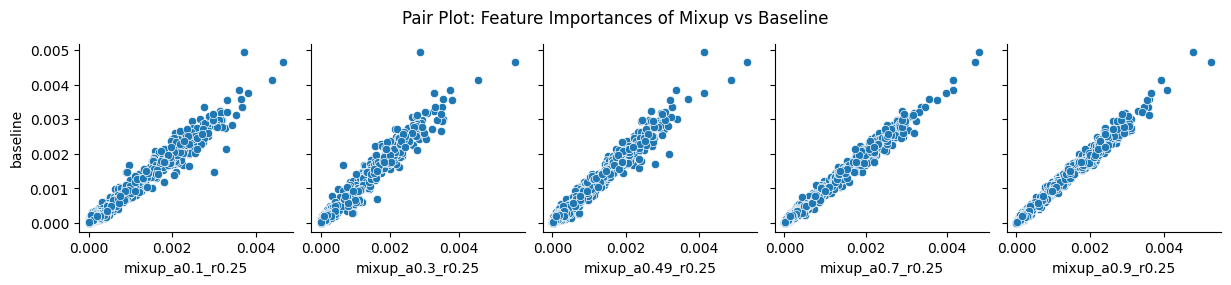

In [44]:
sns.pairplot(
    mixup_importances_df,
    y_vars= ["baseline"],
    x_vars = r_25,
    kind = 'scatter'
)
plt.suptitle('Pair Plot: Feature Importances of Mixup vs Baseline', y=1.1)
plt.show()

We can see here how the feature importances from the baseline model relate to the feature importances obtained from Mixup data augmentation scenarios with a Mixup ratio of 0.25.

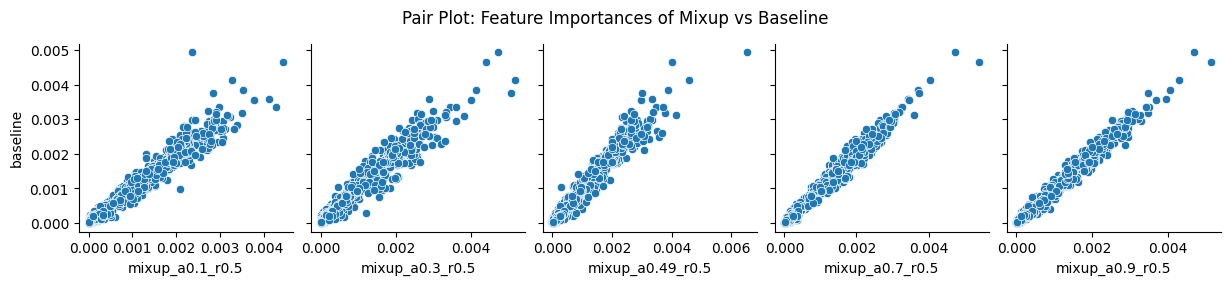

In [45]:
sns.pairplot(
    mixup_importances_df,
    y_vars= ["baseline"],
    x_vars = r_50,
    kind = 'scatter'
)
plt.suptitle('Pair Plot: Feature Importances of Mixup vs Baseline', y=1.1)
plt.show()

Here we visualizes the relationship between the feature importances of the baseline model ("baseline") and a different set of Mixup data augmentation scenarios (r_50).

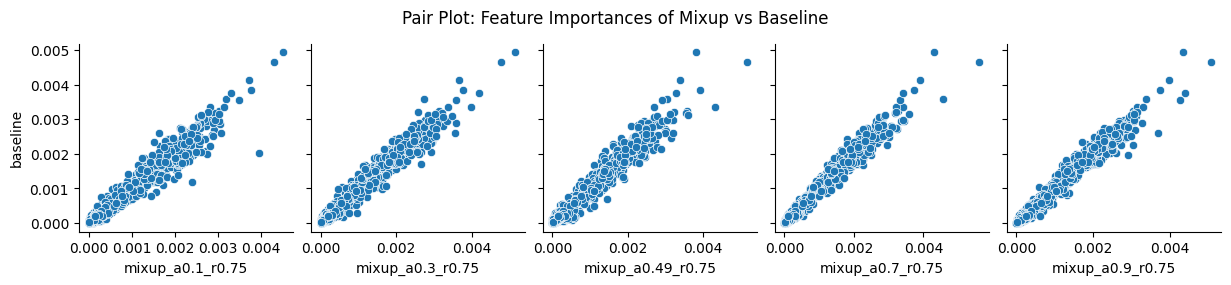

In [46]:
sns.pairplot(
    mixup_importances_df,
    y_vars= ["baseline"],
    x_vars = r_75,
    kind = 'scatter'
)
plt.suptitle('Pair Plot: Feature Importances of Mixup vs Baseline', y=1.1)
plt.show()

Here we visualizes the relationship between the feature importances of the baseline model ("baseline") and a different set of Mixup data augmentation scenarios (r_75).

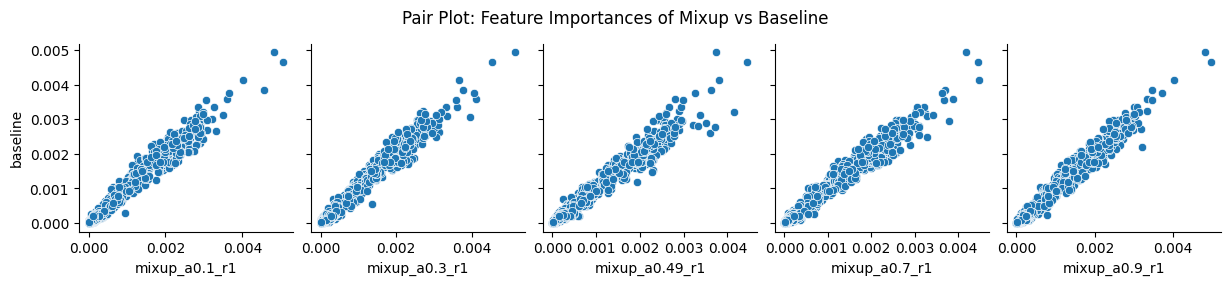

In [47]:
sns.pairplot(
    mixup_importances_df,
    y_vars= ["baseline"],
    x_vars = r_1,
    kind = 'scatter'
)
plt.suptitle('Pair Plot: Feature Importances of Mixup vs Baseline', y=1.1)
plt.show()

Here we visualizes the relationship between the feature importances of the baseline model ("baseline") and a different set of Mixup data augmentation scenarios (r_1).

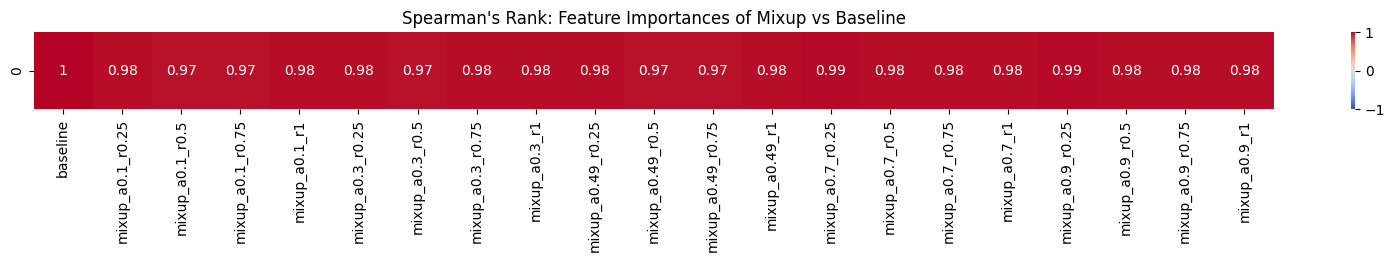

In [48]:
correlation_matrix = mixup_importances_df.corrwith(mixup_importances_df['baseline'],method='spearman')

plt.figure(figsize=(20, 1))
sns.heatmap(correlation_matrix.to_frame().T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman's Rank: Feature Importances of Mixup vs Baseline")
plt.show()

We code to  display the heatmap, allowing  to visually assess the strength and direction of the correlation between feature importances of different Mixup scenarios and the baseline model.

We can clearly see that baseline has the most strong relation instead of mixup data.

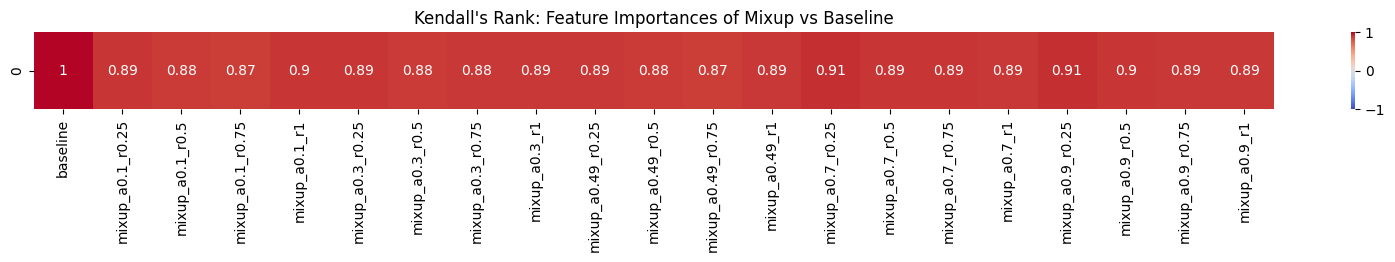

In [49]:
correlation_matrix = mixup_importances_df.corrwith(mixup_importances_df['baseline'],method='kendall')

plt.figure(figsize=(20, 1))
sns.heatmap(correlation_matrix.to_frame().T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Kendall's Rank: Feature Importances of Mixup vs Baseline")
plt.show()

 Here in the heatmap, we can assess the strength and direction of the Kendall's rank correlation between feature importances of different Mixup scenarios and the baseline model.

####  4.1.2 Noise Injection

##### Gaussian Noise

In [50]:
gaussian_importances_df = importances.copy(deep=True)

for noise_levels, importance in gaussian_importances.items():
    gaussian_importances_df[noise_levels] = importance

 In this case, it's specific to feature importances obtained from different levels of Gaussian noise.

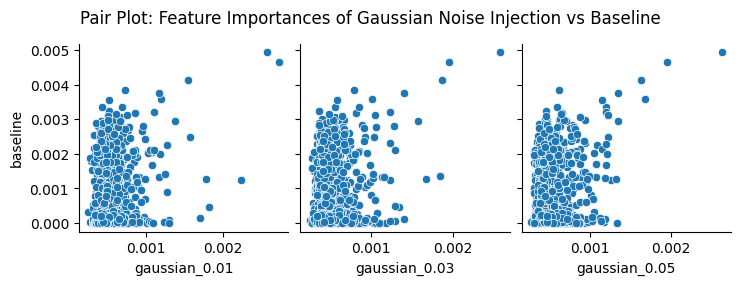

In [51]:
sns.pairplot(
    gaussian_importances_df,
    y_vars= ["baseline"],
    x_vars = gaussian_importances_df.columns.difference(["baseline"]),
    kind = 'scatter'
)
plt.suptitle('Pair Plot: Feature Importances of Gaussian Noise Injection vs Baseline', y=1.1)
plt.show()

These plots depict the relationships between feature importances of the baseline model and feature importances obtained with different levels of Gaussian noise injection.

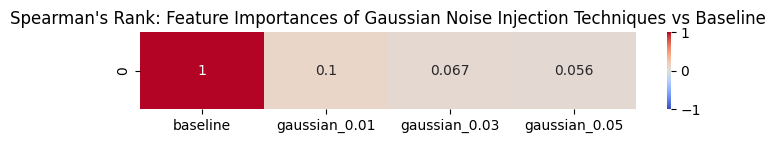

In [52]:
correlation_matrix = gaussian_importances_df.corrwith(gaussian_importances_df['baseline'],method='spearman')

plt.figure(figsize=(8, 1))
sns.heatmap(correlation_matrix.to_frame().T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman's Rank: Feature Importances of Gaussian Noise Injection Techniques vs Baseline")
plt.show()

Here we can see  the strength and direction of the correlation between feature importances from various Gaussian noise injection techniques and the baseline model.

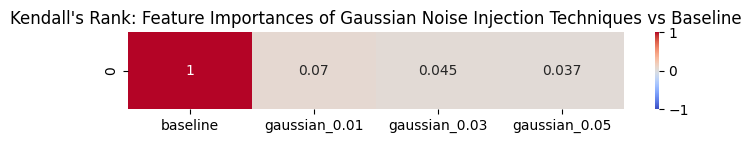

In [54]:
correlation_matrix = gaussian_importances_df.corrwith(gaussian_importances_df['baseline'],method='kendall')

plt.figure(figsize=(8, 1))
sns.heatmap(correlation_matrix.to_frame().T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Kendall's Rank: Feature Importances of Gaussian Noise Injection Techniques vs Baseline")
plt.show()

##### Uniform Noise

In [55]:
uniform_importances_df = importances.copy(deep=True)

for noise_levels, importance in uniform_importances.items():
    uniform_importances_df[noise_levels] = importance

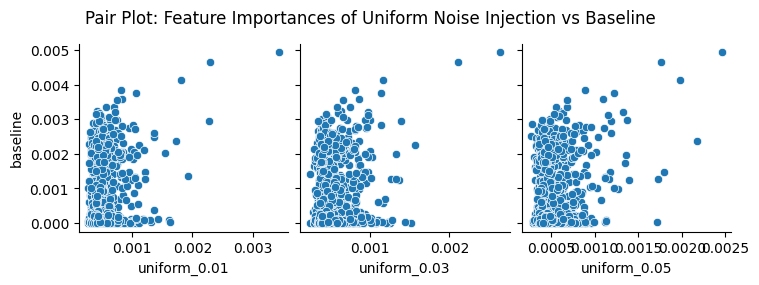

In [56]:
sns.pairplot(
    uniform_importances_df,
    y_vars= ["baseline"],
    x_vars = uniform_importances_df.columns.difference(["baseline"]),
    kind = 'scatter'
)
plt.suptitle('Pair Plot: Feature Importances of Uniform Noise Injection vs Baseline', y=1.1)
plt.show()

Here, we assess the relationships between feature importances of the baseline model and feature importances obtained with different levels of uniform noise injection.

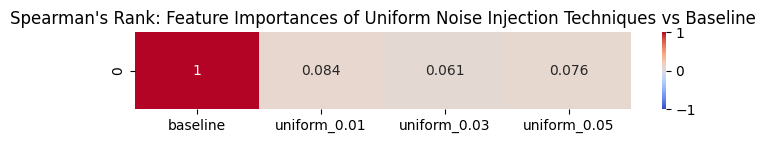

In [57]:
correlation_matrix = uniform_importances_df.corrwith(uniform_importances_df['baseline'],method='spearman')

plt.figure(figsize=(8, 1))
sns.heatmap(correlation_matrix.to_frame().T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman's Rank: Feature Importances of Uniform Noise Injection Techniques vs Baseline")
plt.show()

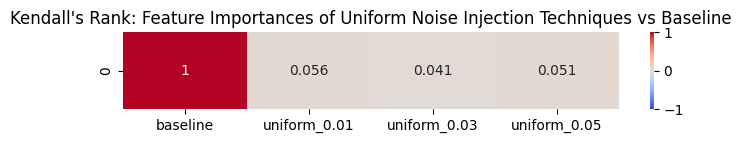

In [58]:
correlation_matrix = uniform_importances_df.corrwith(uniform_importances_df['baseline'],method='kendall')

plt.figure(figsize=(8, 1))
sns.heatmap(correlation_matrix.to_frame().T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Kendall's Rank: Feature Importances of Uniform Noise Injection Techniques vs Baseline")
plt.show()

The choice between Spearman's rank correlation and Kendall's rank correlation for genetic data analysis depends on the specific characteristics of your data and the research questions you want to address.

Both methods are commonly used in genetics, and the choice may depend on the nature of your data and your research objectives.


Spearman's Rank Correlation:Assumes a monotonic relationship between variables.
It is sensitive to the magnitude of differences between data points.
May be more appropriate when your data can be better described by a monotonic relationship, such as when ranking gene expression levels or assessing the order of genetic mutations.

Kendall's Rank Correlation:

Focuses on concordant and discordant pairs of data points, regardless of the magnitude of differences.
Suitable for assessing the strength and direction of the ordinal association when the variables are ranked or ordered.
May be preferred when your data doesn't have a linear or monotonic relationship, but you still want to measure the degree of agreement in the ordering of data points.


####  4.1.3 Sampling Techniques

In [59]:
importances_sampling = importances.copy(deep=True)
importances_sampling['SMOTE'] = smote_importances
importances_sampling['ADASYN'] = adasyn_importances
importances_sampling['RUS'] = under_importances
importances_sampling['ROS'] = over_importances

Here we are aggregating and organizing feature importances from multiple sampling techniques into a single DataFrame.

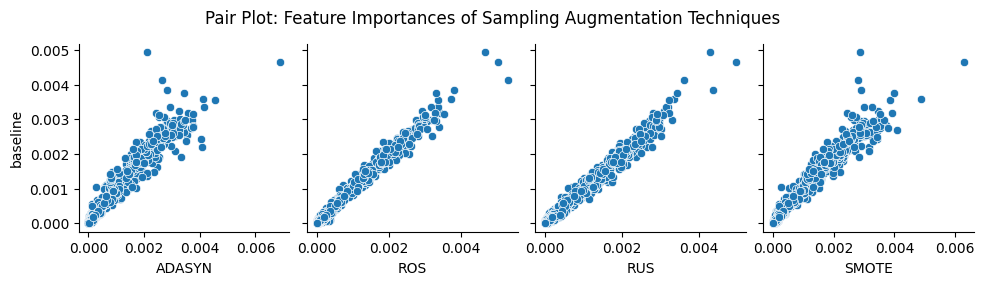

In [60]:
sns.pairplot(
    importances_sampling,
    y_vars= ["baseline"],
    x_vars = importances_sampling.columns.difference(["baseline"]),
    kind = 'scatter'
)
plt.suptitle('Pair Plot: Feature Importances of Sampling Augmentation Techniques', y=1.1)
plt.show()

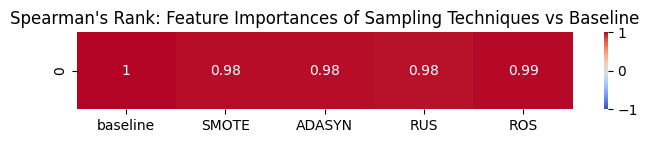

In [61]:
# Calculate the correlation matrix
correlation_matrix = importances_sampling.corrwith(importances_sampling['baseline'],method='spearman')

# Create a correlation heatmap
plt.figure(figsize=(8, 1))
sns.heatmap(correlation_matrix.to_frame().T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman's Rank: Feature Importances of Sampling Techniques vs Baseline")
plt.show()

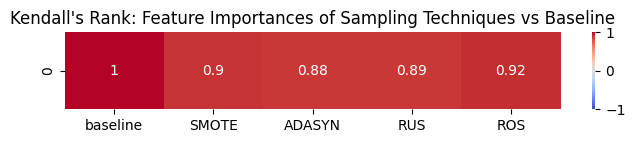

In [62]:
correlation_matrix = importances_sampling.corrwith(importances_sampling['baseline'],method='kendall')

plt.figure(figsize=(8, 1))
sns.heatmap(correlation_matrix.to_frame().T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Kendall's Rank: Feature Importances of Sampling Techniques vs Baseline")
plt.show()

Spearman's and Kendall's rank correlations are suitable  as they are non-parametric methods that assess the monotonic and ordinal relationships between variables, respectively.

### 4.2 F1 Scores

In [63]:
def paired_ttest_f1_scores(df):
    '''Runs Paired T-Test on F1 Scores'''
    techniques = df['Category'].unique()
    ttests = {
        'technique':[],
        't-statistic':[],
        'p-value':[],
        'significant':[],
        'difference':[]
    }
    for technique in techniques:
        if technique != 'Base':
            mask1 = df['Category'] == 'Base'
            mask2 = df['Category'] == technique
            before = df[mask1]
            after = df[mask2]
            t_statistic, p_value = ttest_rel(after['Values'], before['Values'])

            if p_value < 0.05:
                ttests['significant'].append('yes')
            else:
                ttests['significant'].append('no')

            if t_statistic < 0:
                ttests['difference'].append('lower')
            else:
                ttests['difference'].append('higher')

            ttests['technique'].append(technique)
            ttests['t-statistic'].append(t_statistic)
            ttests['p-value'].append(p_value)

    ttests_df = pd.DataFrame(ttests)
    return ttests_df

#### 4.2.1 *mixup* Technique F1 Scores

In [64]:
category = []
values = []

for _, result in base_results.items():
    values.append(result['weighted avg']['f1-score'])
    category.append('Base')

for technique, results in mixup_results.items():
        for _, result in results.items():
            values.append(result['weighted avg']['f1-score'])
            category.append(technique)

In [65]:
mixup_results_df = pd.DataFrame({
    'Category': category,
    'Values': values
})
ttest_mixup_df = paired_ttest_f1_scores(mixup_results_df)

styled_df = ttest_mixup_df.style \
    .background_gradient(subset=['t-statistic'], cmap='Blues') \
    .set_properties(**{'font-size': '12pt', 'font-family': 'Calibri'})

display(styled_df)

Overall, the "mixup" technique appears to have a positive impact on F1 scores in many cases, as indicated by the "higher" values in the "difference" column and the statistical significance (low p-values)

In [ ]:
# plt.figure(figsize=(5, 4))
# sns.boxplot(x='Category', y='Values', data=mixup_results_df)

# plt.title("F1 Scores by Mixup Ratio",fontsize=18)
# plt.ylabel("F1 Score",fontsize=14)
# plt.xlabel("Mixup Ratio",fontsize=14)
# plt.xticks(rotation=45, fontsize=12)
# plt.yticks(fontsize=12)

# plt.show()

#### 4.2.2 Noise Technique F1 Scores

In [66]:
category = []
values = []

for _, result in base_results.items():
    values.append(result['weighted avg']['f1-score'])
    category.append('base')

for technique, results in gaussian_results.items():
        for _, result in results.items():
            values.append(result['weighted avg']['f1-score'])
            category.append(technique)

for technique, results in uniform_results.items():
        for _, result in results.items():
            values.append(result['weighted avg']['f1-score'])
            category.append(technique)

In [67]:
noise_results_df = pd.DataFrame({
    'Category': category,
    'Values': values
})

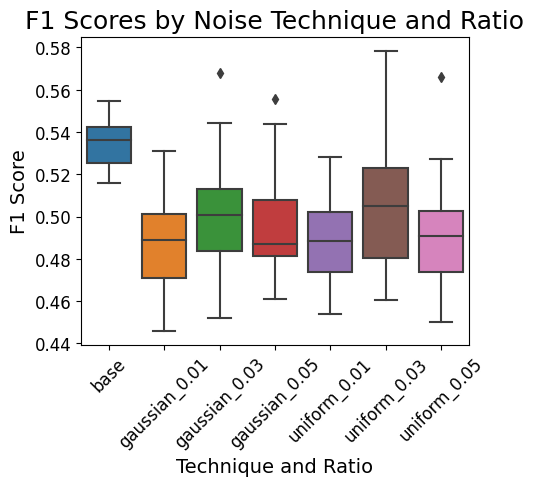

In [68]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='Category', y='Values', data=noise_results_df)

plt.title("F1 Scores by Noise Technique and Ratio",fontsize=18)
plt.ylabel("F1 Score",fontsize=14)
plt.xlabel("Technique and Ratio",fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

#### 4.2.2 All Technique Scores

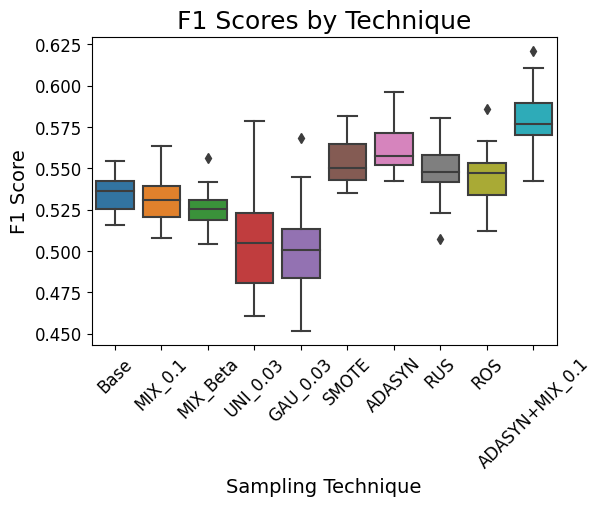

In [69]:
sampling_results = [
    ('Base',base_results),
    ('MIX_0.1',mixup_results['mixup_a0.9_r1']),
    ('MIX_Beta',mixup_beta_results),
    ('UNI_0.03',uniform_results['uniform_0.03']),
    ('GAU_0.03',gaussian_results['gaussian_0.03']),
    ('SMOTE',smote_results),
    ('ADASYN',adasyn_results),
    ('RUS',under_results),
    ('ROS',over_results),
    ('ADASYN+MIX_0.1',adasyn_mixup_results),

]
category = []
values = []

for results in sampling_results:
    for _, result in results[1].items():
        values.append(result['weighted avg']['f1-score'])
        category.append(results[0])

sampling_results_df = pd.DataFrame({
    'Category': category,
    'Values': values
})
plt.figure(figsize=(6, 4))
sns.boxplot(x='Category', y='Values', data=sampling_results_df)

plt.title("F1 Scores by Technique",fontsize=18)
plt.ylabel("F1 Score",fontsize=14)
plt.xlabel("Sampling Technique",fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Here , we can see htat ADASYN + MIX_0.1 have the highest F1 score .

#### 4.2.3 Paired T-Test
Testing if there is a statistically significant difference between the Baseline F1 score and others.

In [76]:
paired_ttest_f1_scores(sampling_results_df)

technique  t-statistic       p-value significant difference
0         MIX_0.1    -0.812167  4.233128e-01          no      lower
1        MIX_Beta    -3.430872  1.827222e-03         yes      lower
2        UNI_0.03    -5.074110  2.064366e-05         yes      lower
3        GAU_0.03    -6.743507  2.119352e-07         yes      lower
4           SMOTE     6.308613  6.855189e-07         yes     higher
5          ADASYN     9.987800  6.785149e-11         yes     higher
6             RUS     4.700511  5.827743e-05         yes     higher
7             ROS     3.622536  1.102934e-03         yes     higher
8  ADASYN+MIX_0.1    13.058198  1.131953e-13         yes     higher

Based on these results, most of these techniques or scenarios appear to have a statistically significant negative impact on performance, as they are associated with "lower" performance compared to the reference point.
"SMOTE" and "ADASYN+MIX_0.1" are the exceptions, showing a statistically significant "higher" performance compared to the reference point.

### 4.3 ROC AUC Plots

In [77]:
def plot_average_roc_curve(results, ax):
    # Define a mean FPR space
    mean_fpr = np.linspace(0, 1, 100)
    all_tprs = []

    # Interpolate the TPRs of all seeds at the mean FPR
    for seed, values in results.items():
        interpolated_tpr = np.interp(mean_fpr, values['fpr'], values['tpr'])
        interpolated_tpr[0] = 0.0
        all_tprs.append(interpolated_tpr)

    # Compute the average TPR at each point on the mean FPR
    mean_tpr = np.mean(all_tprs, axis=0)
    mean_tpr[-1] = 1.0

    # Calculate the AUC for the average ROC curve
    mean_auc = np.trapz(mean_tpr, mean_fpr)

    ax.plot(mean_fpr, mean_tpr, color='b', label=f'Average ROC (AUC: {mean_auc:.2f})')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Average ROC Curve')
    ax.legend(loc='lower right')

In [78]:
def subplot_roc_curves(results_list, titles):
    # Number of rows and columns for subplots
    n_rows = int(np.ceil(len(results_list) / 3))
    n_cols = 3

    # Create a grid of subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

    # If there's only one row, axs is a 1D array
    if n_rows == 1:
        axs = np.expand_dims(axs, axis=0)

    # Loop through results and title_suffixes to plot each subplot
    for i, (res, title) in enumerate(zip(results_list, titles)):
        row = i // n_cols
        col = i % n_cols
        plot_average_roc_curve(res, axs[row, col])
        axs[row, col].set_title(f'Average ROC Curve For {title}')

    # Remove any unused subplots
    for j in range(i+1, n_rows*n_cols):
        row = j // n_cols
        col = j % n_cols
        axs[row, col].axis('off')

    plt.tight_layout()
    plt.show()

#### 4.3.1 ROC AUC for Sampling techniques and base model

In [73]:
sampling_results_list = [base_results, smote_results, adasyn_results, under_results, over_results]
sampling_plot_titles = ['Base', 'SMOTE', 'ADASYN', 'ROS', 'RUS']

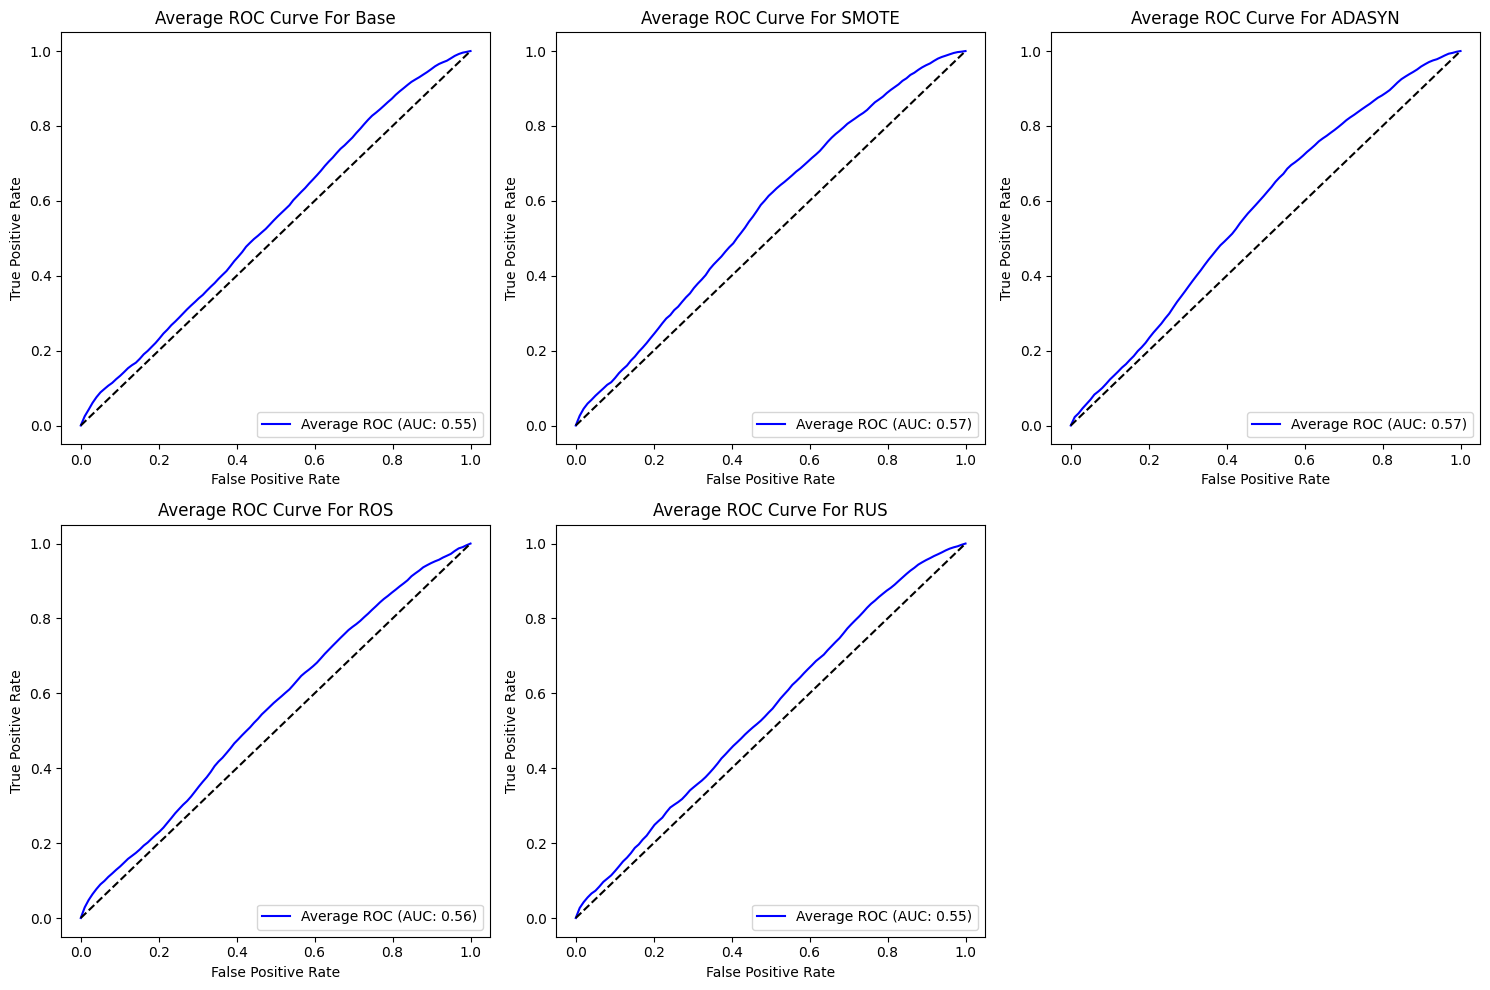

In [74]:
subplot_roc_curves(sampling_results_list, sampling_plot_titles)

#### 4.3.2 ROC AUC for Mixup

In [75]:
def extract_results_from_mixup(mixup_results):
    """
    Extract results and title suffixes from the mixup_results dictionary.
    """
    extracted_results = []
    titles = []

    # Loop through the mixup_results dictionary
    for mixup_key, results in mixup_results.items():
        # Extract the ROC curve data for each level of augmentation
        roc_data = {}
        for seed, metrics in results.items():
            roc_data[seed] = {
                'fpr': metrics['fpr'],
                'tpr': metrics['tpr']
            }

        # Append the extracted data and title suffix
        extracted_results.append(roc_data)
        title = mixup_key.split('_')[-1]  # Extract the augmentation level from the key
        titles.append(title)

    return extracted_results, titles

In [79]:
mixup_results_list, mixup_plot_titles = extract_results_from_mixup(mixup_results)
mixup_plot_titles = ['Mixup level of ' + item for item in mixup_plot_titles]

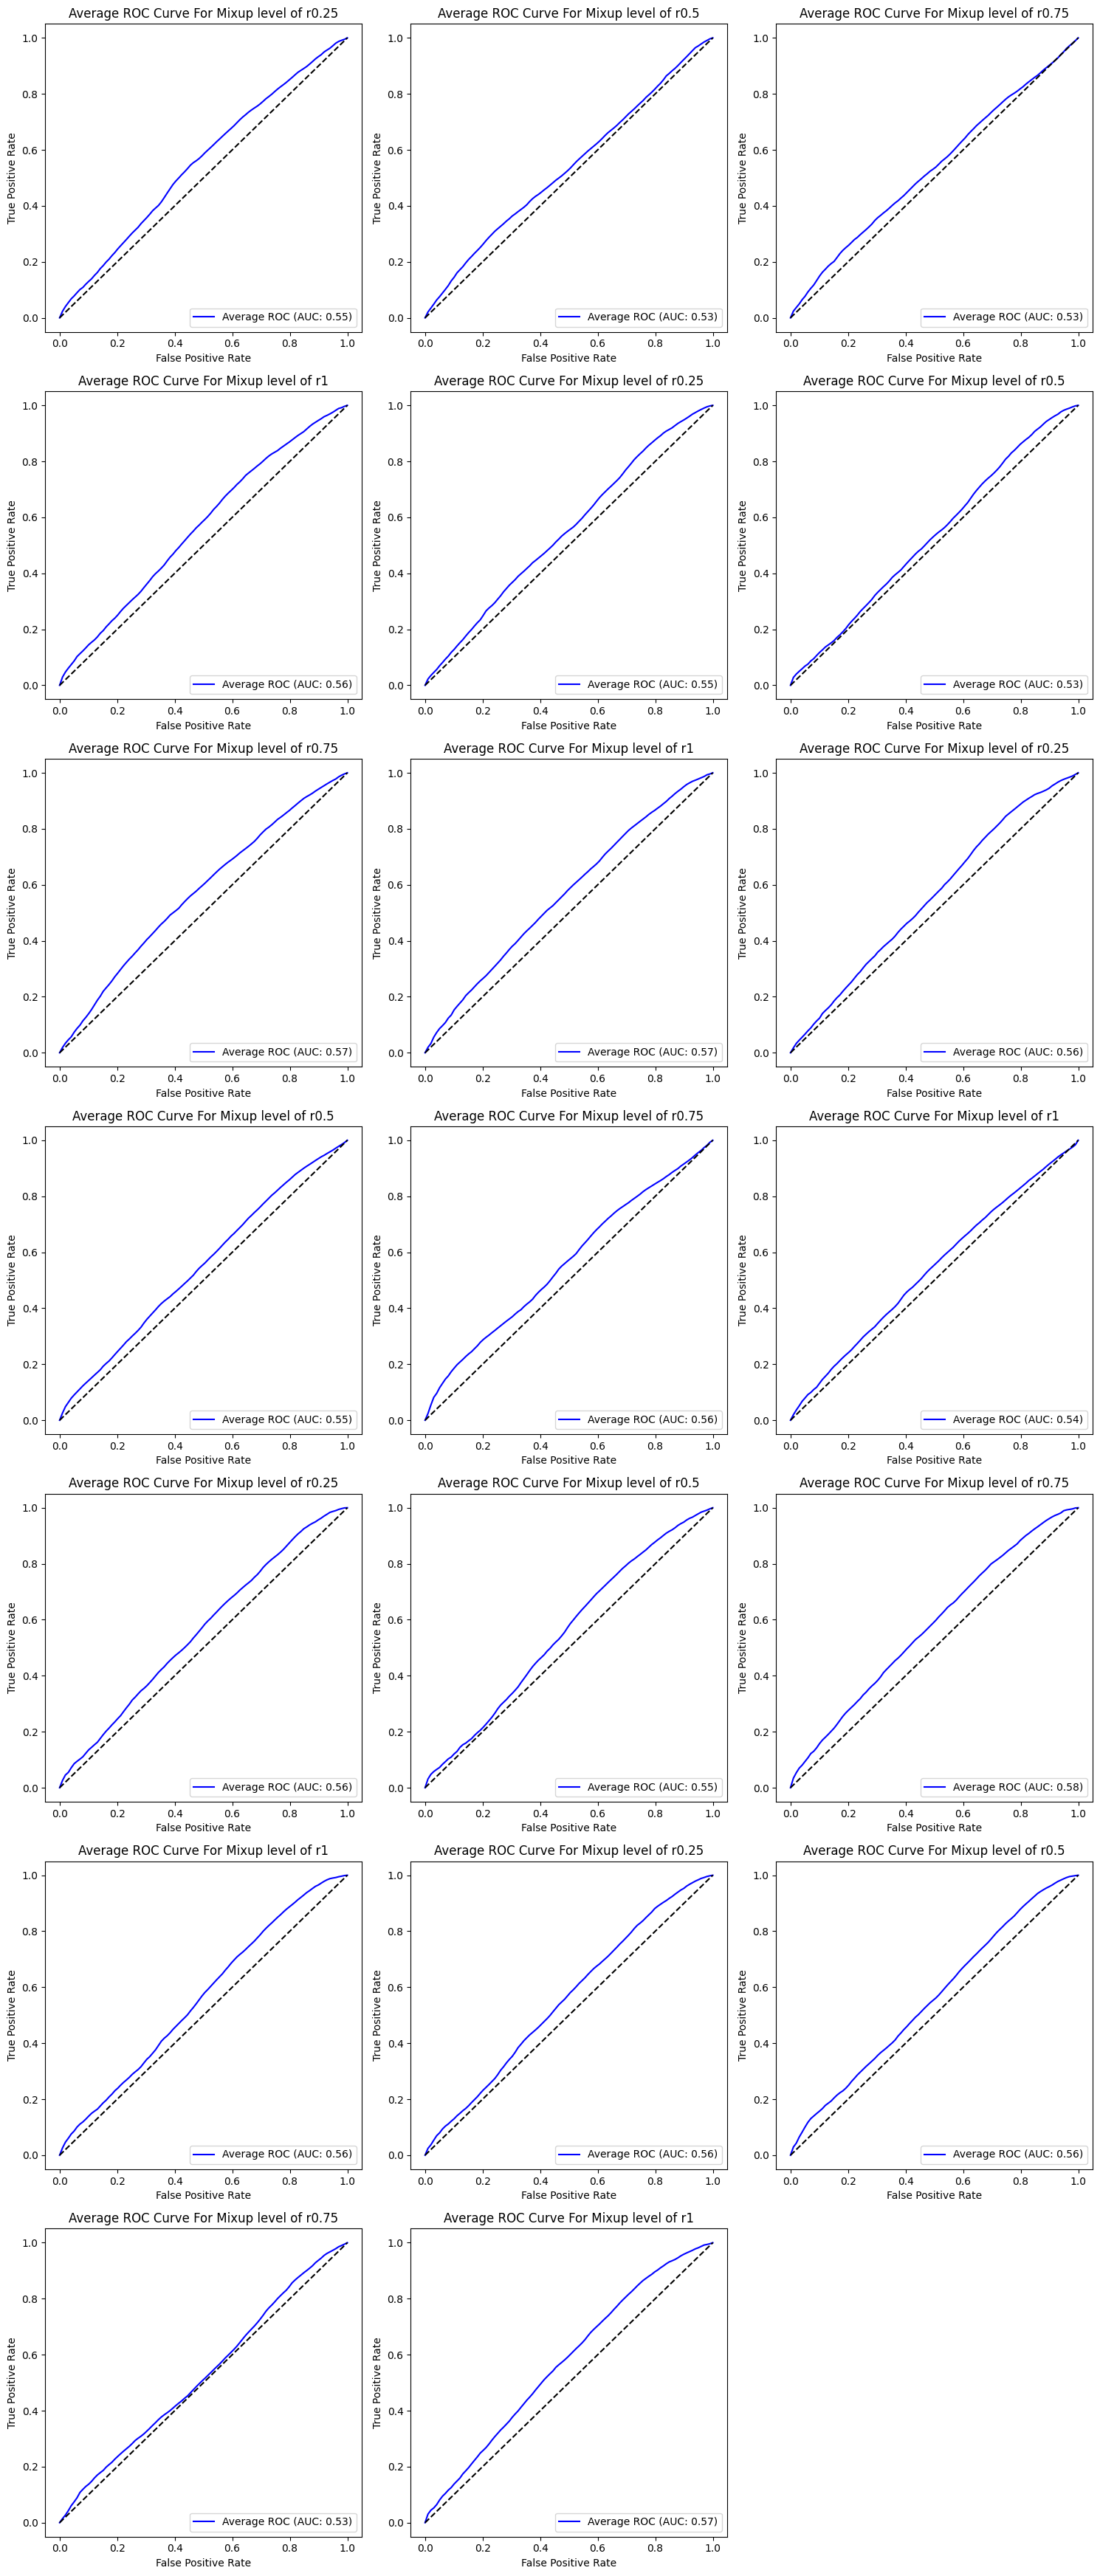

In [80]:
subplot_roc_curves(mixup_results_list, mixup_plot_titles)

#### 4.3.3 ROC AUC for Gaussian Noise

In [81]:
gaussian_results_list, gaussian_plot_titles = extract_results_from_mixup(gaussian_results)
gaussian_plot_titles = ['Gaussian Noise of ' + item for item in gaussian_plot_titles]

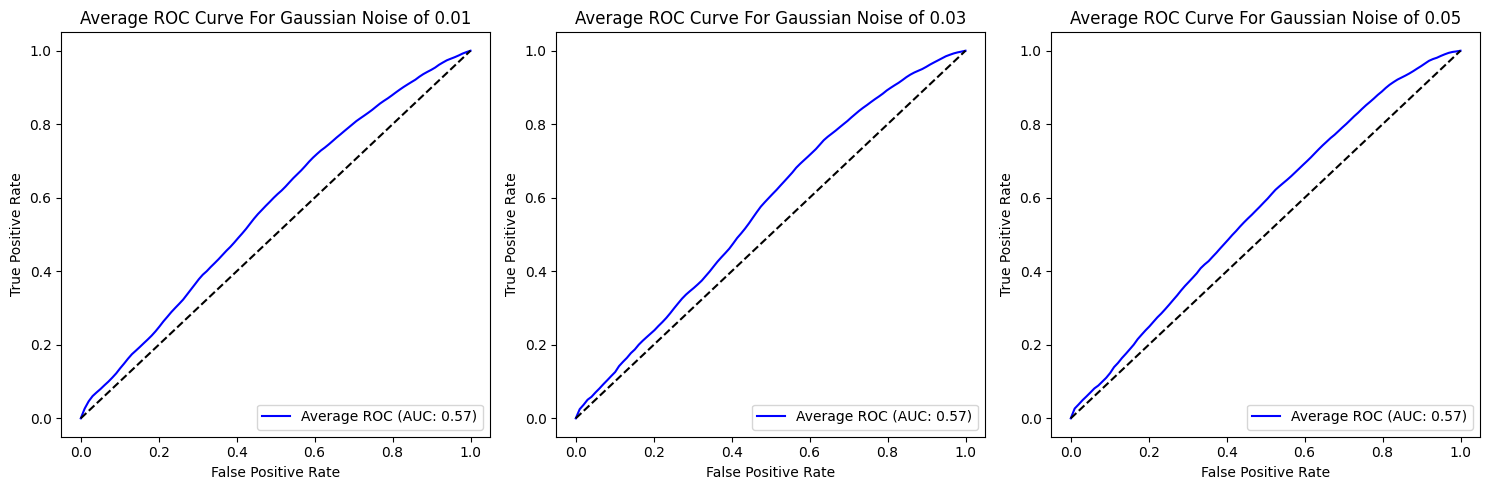

In [82]:
subplot_roc_curves(gaussian_results_list, gaussian_plot_titles)

#### 4.3.4 ROC AUC for Uniform Noise

In [83]:
uniform_results_list, uniform_plot_titles = extract_results_from_mixup(uniform_results)
uniform_plot_titles = ['Uniform Noise of ' + item for item in uniform_plot_titles]

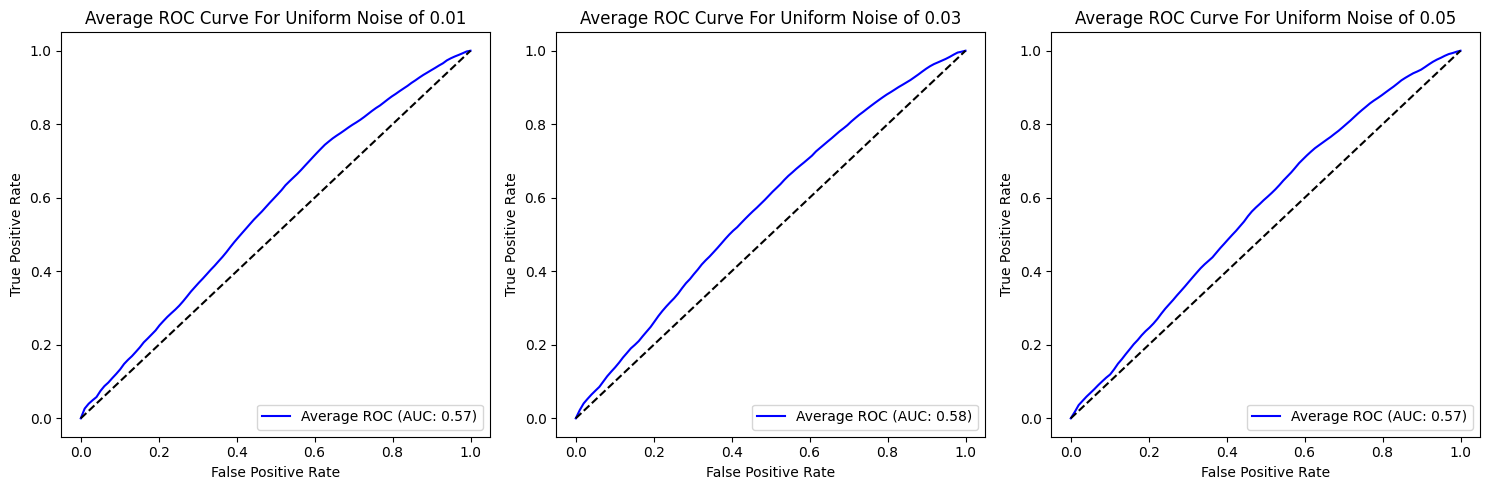

In [84]:
subplot_roc_curves(uniform_results_list, uniform_plot_titles)

### 4.4 Classification Report
Collecting all the evaluation metrics for each technique into a single table for direct comparison.

In [85]:
def get_score_averages(results_dic, seeds):
    '''Gets the average precision, recall and F1 scores for each technique'''
    precision = 0
    recall = 0
    f1_score = 0
    for seed in seeds:
        precision += results_dic[str(seed)]['weighted avg']['precision']
        recall += results_dic[str(seed)]['weighted avg']['recall']
        f1_score += results_dic[str(seed)]['weighted avg']['f1-score']

    precision = precision/len(seeds)
    recall = recall/len(seeds)
    f1_score = f1_score/len(seeds)

    averages = np.array([precision,recall,f1_score])
    return averages

In [86]:
# Get average scores for each technique
averages_dic = {}
averages_dic['baseline'] = get_score_averages(base_results, seeds)
averages_dic['SMOTE'] = get_score_averages(smote_results, seeds)
averages_dic['ADASYN'] = get_score_averages(adasyn_results, seeds)
averages_dic['Random Undersampling'] = get_score_averages(under_results, seeds)
averages_dic['Random Oversampling'] = get_score_averages(over_results, seeds)
for technique, results in mixup_results.items():
    averages_dic[technique] = get_score_averages(mixup_results[technique], seeds)
for technique, results in gaussian_results.items():
    averages_dic[technique] = get_score_averages(gaussian_results[technique], seeds)
for technique, results in uniform_results.items():
    averages_dic[technique] = get_score_averages(uniform_results[technique], seeds)

In [87]:
score_averages_df = pd.DataFrame.from_dict(averages_dic, orient='index', columns = ['precision','recall','f1-score'])

In [88]:
styled_df = score_averages_df.style \
    .background_gradient(subset=['precision'], cmap='Blues') \
    .background_gradient(subset=['recall'], cmap='Blues') \
    .background_gradient(subset=['f1-score'], cmap='Blues') \
    .set_properties(**{'font-size': '12pt', 'font-family': 'Calibri'})

display(styled_df)

Techniques like "ADASYN" and "SMOTE" tend to show higher precision and recall, resulting in relatively high F1-scores. These techniques may be effective for disease detection.
"Random Undersampling" and "Random Oversampling" have lower F1-scores, suggesting a trade-off between precision and recall.
"Gaussian" and "Uniform" noise injection techniques show lower F1-scores, indicating potential challenges in disease detection with these methods.
"Mixup" techniques with different settings exhibit varying impacts on disease detection performance, with some settings showing higher F1-scores and others lower.

Overall, the choice of the most suitable data augmentation technique will depends on the specific goals and priorities of the disease detection.
If minimizing false positives is crucial, techniques with higher precision may be preferred.